In [9]:
#CAPSTONE

In [501]:
#Install modules
!pip install numpy
!pip install matplotlib
!pip install plotly
!pip install world_trade_data --upgrade


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for world_trade_data: filename=world_trade_data-0.1.1-py3-none-any.whl size=8862 sha256=d7cfd9efc8605ec0cd90e15073502efc770066385b738b083465aaca013bed0b
  Stored in directory: c:\users\olver\appdata\local\pip\cache\wheels\82\18\b0\fae94429af0b5e6b917c982a0287f812c848c0584676f8f2e0
Successfully built world_trade_data


In [502]:
# Download and run modules
import pandas as pd
import matplotlib as mp
import sklearn as sk
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import world_trade_data as wits



In [12]:
#import Data

In [13]:
pth = "C:\\REPO\\2023-02-DSI-WE\\OlveraJ\\CAPSTONE\\DATA\\Taiwan_Trade_Exports.csv" 
!type $pth

Product 	Flow	Country	Product Classification	Unit	2013	2014	2015	2016	2017	2018	2019	2020	2021	2022
0--All Merchandise	Exports	Taiwan	HS - 2	Millions of USD	$25,523	$26,675	$25,826	$26,034	$25,736	$30,478	$31,202	$30,213	$36,838	$43,713
84--Nuclear Reactors, Boilers, Machinery	Exports	Taiwan	HS - 2	Millions of USD	$4,748	$4,363	$4,937	$5,360	$5,043	$4,655	$5,617	$5,695	$7,502	$8,748
85--Electric Machinery Etc; Sound Equip	Exports	Taiwan	HS - 2	Millions of USD	$4,041	$4,222	$4,500	$5,208	$4,850	$4,866	$4,513	$5,251	$6,745	$7,842
27--Mineral Fuel, Oil; Bitumin Subst	Exports	Taiwan	HS - 2	Millions of USD	$1,127	$781	$229	$97	$730	$3,968	$4,465	$3,277	$4,674	$7,188
90--Optic, Photo, Medic Or Surgical Instrments	Exports	Taiwan	HS - 2	Millions of USD	$1,633	$1,838	$1,814	$1,751	$1,803	$2,086	$2,217	$2,274	$2,464	$3,008
88--Aircraft, Spacecraft, And Parts Thereof	Exports	Taiwan	HS - 2	Millions of USD	$1,752	$2,860	$2,890	$3,157	$2,867	$2,621	$2,737	$2,111	$2,189	$1,958
39--Plastics & Articles

In [14]:
ex = pd.read_csv(pth, encoding= 'utf16', sep="\t")


In [18]:
#Creating a function to import the Different table with correct encoding into a List of Lists
def tabfix(pth):
    ex = pd.read_csv(pth, encoding= 'utf16', sep="\t")
    TexpY = list(ex.columns)
    for T in TexpY [5:]:
        ex[T]= ex[T].str.replace("$","")
        ex[T]= ex[T].str.replace(",","")
        ex[T]= ex[T].astype(float)
    return ex

In [19]:
ex = tabfix(pth)

C:\Users\olver\AppData\Local\Temp\ipykernel_32940\190477155.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ex[T]= ex[T].str.replace("$","")


In [21]:
ix = tabfix(pth.replace("Ex","Im"))

C:\Users\olver\AppData\Local\Temp\ipykernel_32940\190477155.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ex[T]= ex[T].str.replace("$","")


In [22]:
for T in TexpY [5:]:ex[T]= ex[T].str.replace("$","")
for T in TexpY [5:]:ex[T]= ex[T].str.replace(",","")

NameError: name 'TexpY' is not defined

In [23]:
ex

,Product,Flow,Country,Product Classification,Unit,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,25523.0,26675.0,25826.0,26034.0,25736.0,30478.0,31202.0,30213.0,36838.0,43713.0
1,"84--Nuclear Reactors, Boilers, Machinery",Exports,Taiwan,HS - 2,Millions of USD,4748.0,4363.0,4937.0,5360.0,5043.0,4655.0,5617.0,5695.0,7502.0,8748.0
2,85--Electric Machinery Etc; Sound Equip,Exports,Taiwan,HS - 2,Millions of USD,4041.0,4222.0,4500.0,5208.0,4850.0,4866.0,4513.0,5251.0,6745.0,7842.0
3,"27--Mineral Fuel, Oil; Bitumin Subst",Exports,Taiwan,HS - 2,Millions of USD,1127.0,781.0,229.0,97.0,730.0,3968.0,4465.0,3277.0,4674.0,7188.0
4,"90--Optic, Photo, Medic Or Surgical Instrments",Exports,Taiwan,HS - 2,Millions of USD,1633.0,1838.0,1814.0,1751.0,1803.0,2086.0,2217.0,2274.0,2464.0,3008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,"46--Mfr Of Straw, Esparto",Exports,Taiwan,HS - 2,Millions of USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,45--Cork And Articles Of Cork,Exports,Taiwan,HS - 2,Millions of USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,"66--Umbrellas, Walking-Sticks",Exports,Taiwan,HS - 2,Millions of USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,53--Veg Text Fib Nesoi,Exports,Taiwan,HS - 2,Millions of USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
ix

,Product,Flow,Country,Product Classification,Unit,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0--All Merchandise,Imports,Taiwan,HS - 2,Millions of USD,37939.0,40840.0,40911.0,39199.0,42418.0,45709.0,54229.0,60432.0,77064.0,91845.0
1,85--Electric Machinery Etc; Sound Equip,Imports,Taiwan,HS - 2,Millions of USD,13897.0,14721.0,14166.0,13780.0,14056.0,14153.0,16051.0,18582.0,23259.0,28990.0
2,"84--Nuclear Reactors, Boilers, Machinery",Imports,Taiwan,HS - 2,Millions of USD,6622.0,7053.0,6709.0,6820.0,8177.0,9809.0,15516.0,18454.0,23588.0,28194.0
3,73--Articles Of Iron Or Steel,Imports,Taiwan,HS - 2,Millions of USD,2295.0,2471.0,2535.0,2226.0,2636.0,3049.0,2987.0,2613.0,3361.0,4729.0
4,"87--Vehicles, Except Railway Or Tramway",Imports,Taiwan,HS - 2,Millions of USD,2366.0,2447.0,2696.0,2503.0,2605.0,2796.0,2962.0,2941.0,3750.0,4527.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,24--Tobacco & Manufactured Tobacco Substitutes,Imports,Taiwan,HS - 2,Millions of USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,14--Vegetable Plaiting Materials & Products,Imports,Taiwan,HS - 2,Millions of USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,"50--Silk, Including Yarns",Imports,Taiwan,HS - 2,Millions of USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
96,36--Explosives; Pyrotechnics,Imports,Taiwan,HS - 2,Millions of USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#writting to csv files
ex.to_csv('..\\DATA\\IMPS.csv', index=None)
ix.to_csv('..\\DATA\\EXPS.csv', index=None)

In [248]:
# Enconding date...Making data readable
ex = pd.read_csv(r'C:/REPO/2023-02-DSI-WE/OlveraJ/CAPSTONE/DATA/Taiwan_Trade_Exports.csv', encoding='utf-16')


ParserError: Error tokenizing data. C error: Expected 11 fields in line 3, saw 13


In [249]:
for T in TexpY [5:]:ex[T]= ex[T].astype(float)

KeyError: 'Product'

In [250]:
ex[""]= ex[""].replace("$","")

KeyError: ''

In [ ]:
# Verifying the data import and shaping

In [251]:
ex.describe()

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,520.877551,544.387755,527.030612,531.275510,525.193878,621.979592,636.765306,616.540816,751.816327,892.132653
std,2642.913022,2759.722004,2691.369545,2731.213034,2688.108612,3162.813448,3249.078054,3149.159784,3858.155457,4592.520651
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,6.250000,7.000000,8.000000,7.000000,7.000000,7.500000,6.000000,8.000000,7.250000
50%,40.000000,42.500000,38.000000,33.000000,33.500000,39.000000,38.500000,37.500000,36.500000,43.500000
75%,185.500000,163.000000,136.000000,131.000000,139.250000,172.500000,171.000000,169.000000,179.750000,178.250000
max,25523.000000,26675.000000,25826.000000,26034.000000,25736.000000,30478.000000,31202.000000,30213.000000,36838.000000,43713.000000


In [29]:
ix.describe()

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,98.000000,97.000000,98.000000,98.000000,98.000000,97.000000,97.000000,97.000000,97.000000,98.000000
mean,774.285714,842.020619,834.948980,800.030612,865.683673,942.443299,1118.134021,1245.969072,1588.917526,1874.397959
std,4108.724017,4435.663885,4398.683281,4226.103900,4559.882406,4927.861641,5909.187239,6632.866035,8448.376505,10055.449937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.250000,5.000000,5.000000,4.250000,5.250000,6.000000,5.000000,5.000000,4.000000,3.500000
50%,39.000000,38.000000,47.000000,38.000000,38.000000,38.000000,37.000000,42.000000,46.000000,52.000000
75%,119.250000,126.000000,135.750000,126.750000,158.000000,137.000000,164.000000,156.000000,224.000000,286.500000
max,37939.000000,40840.000000,40911.000000,39199.000000,42418.000000,45709.000000,54229.000000,60432.000000,77064.000000,91845.000000


In [30]:
TexpY = list(ex.columns)

In [31]:
TimpY = list(ix.columns)

In [33]:
TimpY

['Product ',
 'Flow',
 'Country',
 'Product Classification',
 'Unit',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022']

In [34]:
TexpY

['Product ',
 'Flow',
 'Country',
 'Product Classification',
 'Unit',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022']

In [ ]:
# //////// Cleaning & Shaping the Data ////////

In [ ]:
TexpY.head(10)

,Product,Flow,Country,Product Classification,Unit,Year,value
0,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,2013,25523.0
1,"84--Nuclear Reactors, Boilers, Machinery",Exports,Taiwan,HS - 2,Millions of USD,2013,4748.0
2,85--Electric Machinery Etc; Sound Equip,Exports,Taiwan,HS - 2,Millions of USD,2013,4041.0
3,"27--Mineral Fuel, Oil; Bitumin Subst",Exports,Taiwan,HS - 2,Millions of USD,2013,1127.0
4,"90--Optic, Photo, Medic Or Surgical Instrments",Exports,Taiwan,HS - 2,Millions of USD,2013,1633.0
5,"88--Aircraft, Spacecraft, And Parts Thereof",Exports,Taiwan,HS - 2,Millions of USD,2013,1752.0
6,39--Plastics & Articles Thereof,Exports,Taiwan,HS - 2,Millions of USD,2013,851.0
7,12--Oil Seeds Etc.; Misc Grain,Exports,Taiwan,HS - 2,Millions of USD,2013,652.0
8,02--Meat & Edible Meat Offal,Exports,Taiwan,HS - 2,Millions of USD,2013,455.0
9,"98--Special Classification Provisions, Nesoi",Exports,Taiwan,HS - 2,Millions of USD,2013,402.0


In [ ]:
print(TexpY.columns)

In [ ]:
list(ex.columns)

['Product ',
 'Flow',
 'Country',
 'Product Classification',
 'Unit',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022']

In [36]:
# Unpivoting data columns / Panda Melt
TimpY = pd.melt(ix, id_vars = ['Product ', 'Flow', 'Country', 'Product Classification', 'Unit'], value_vars=['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], var_name='Year')
TexpY = pd.melt(ex, id_vars = ['Product ', 'Flow', 'Country', 'Product Classification', 'Unit'], value_vars=['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], var_name='Year')

In [37]:
TimpY = TimpY.rename(columns={"Product ":"Product"}, copy= True)
TexpY = TexpY.rename(columns={"Product ":"Product"}, copy= True)

In [ ]:
TexpY.query("Product == '0--All Merchandise'")

,Product,Flow,Country,Product Classification,Unit,Year,value
0,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,2013,25523.0
98,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,2014,26675.0
196,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,2015,25826.0
294,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,2016,26034.0
392,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,2017,25736.0
490,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,2018,30478.0
588,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,2019,31202.0
686,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,2020,30213.0
784,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,2021,36838.0
882,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,2022,43713.0


In [38]:
TexpY.columns


Index(['Product', 'Flow', 'Country', 'Product Classification', 'Unit', 'Year',
       'value'],
      dtype='object')

In [39]:
TimpY.columns


Index(['Product', 'Flow', 'Country', 'Product Classification', 'Unit', 'Year',
       'value'],
      dtype='object')

In [40]:
# Define Top Imports and Exports
TexpY_sorted = TexpY.sort_values(by=['Product'], ascending=False)
ExportsTop10 = TexpY_sorted.head(10)
print(ExportsTop10)
#cherry pick 5 products per imp x export



                                          Product     Flow Country  \
303  98--Special Classification Provisions, Nesoi  Exports  Taiwan   
499  98--Special Classification Provisions, Nesoi  Exports  Taiwan   
793  98--Special Classification Provisions, Nesoi  Exports  Taiwan   
401  98--Special Classification Provisions, Nesoi  Exports  Taiwan   
107  98--Special Classification Provisions, Nesoi  Exports  Taiwan   
597  98--Special Classification Provisions, Nesoi  Exports  Taiwan   
695  98--Special Classification Provisions, Nesoi  Exports  Taiwan   
9    98--Special Classification Provisions, Nesoi  Exports  Taiwan   
891  98--Special Classification Provisions, Nesoi  Exports  Taiwan   
205  98--Special Classification Provisions, Nesoi  Exports  Taiwan   

    Product Classification             Unit  Year   value  
303                 HS - 2  Millions of USD  2016   478.0  
499                 HS - 2  Millions of USD  2018   613.0  
793                 HS - 2  Millions of USD  2021

In [41]:
TimpY_sorted = TimpY.sort_values(by=['Product'], ascending=False)
ImportsTop10 = TimpY_sorted.head(10)
print(ImportsTop10)


                                  Product     Flow Country  \
112  99--Special Import Provisions, Nesoi  Imports  Taiwan   
504  99--Special Import Provisions, Nesoi  Imports  Taiwan   
896  99--Special Import Provisions, Nesoi  Imports  Taiwan   
308  99--Special Import Provisions, Nesoi  Imports  Taiwan   
406  99--Special Import Provisions, Nesoi  Imports  Taiwan   
798  99--Special Import Provisions, Nesoi  Imports  Taiwan   
602  99--Special Import Provisions, Nesoi  Imports  Taiwan   
14   99--Special Import Provisions, Nesoi  Imports  Taiwan   
700  99--Special Import Provisions, Nesoi  Imports  Taiwan   
210  99--Special Import Provisions, Nesoi  Imports  Taiwan   

    Product Classification             Unit  Year  value  
112                 HS - 2  Millions of USD  2014  597.0  
504                 HS - 2  Millions of USD  2018  596.0  
896                 HS - 2  Millions of USD  2022  817.0  
308                 HS - 2  Millions of USD  2016  526.0  
406                 HS

In [ ]:
#Visualizations

In [ ]:
#Define Data

### T10 FUNCTIONS ###

In [542]:
#Creating a function to get the top 10 exports for each year
def Top10_Exports(E_YR,TexpY):
    TS = dict()
    for E in E_YR:
        Yearlist_Exports= list(TexpY[TexpY.Year == E].sort_values('value', ascending=False).head(7)["Product"])
        Yearlist_Exports_value= list(TexpY[TexpY.Year == E].sort_values('value', ascending=False).head(7)["value"])
        TS[E] = Yearlist_Exports
        TS[E+"_value"] = Yearlist_Exports_value
    return TS

In [543]:
Top10_Imports = pd.DataFrame(Top10_Exports(Yearlist_Exports, TimpY))

In [544]:
Top10_Imports

,2013,2013_value,2014,2014_value,2015,2015_value,2016,2016_value,2017,2017_value,2018,2018_value,2019,2019_value,2020,2020_value,2021,2021_value,2022,2022_value
0,0--All Merchandise,37939.0,0--All Merchandise,40840.0,0--All Merchandise,40911.0,0--All Merchandise,39199.0,0--All Merchandise,42418.0,0--All Merchandise,45709.0,0--All Merchandise,54229.0,0--All Merchandise,60432.0,0--All Merchandise,77064.0,0--All Merchandise,91845.0
1,85--Electric Machinery Etc; Sound Equip,13897.0,85--Electric Machinery Etc; Sound Equip,14721.0,85--Electric Machinery Etc; Sound Equip,14166.0,85--Electric Machinery Etc; Sound Equip,13780.0,85--Electric Machinery Etc; Sound Equip,14056.0,85--Electric Machinery Etc; Sound Equip,14153.0,85--Electric Machinery Etc; Sound Equip,16051.0,85--Electric Machinery Etc; Sound Equip,18582.0,"84--Nuclear Reactors, Boilers, Machinery",23588.0,85--Electric Machinery Etc; Sound Equip,28990.0
2,"84--Nuclear Reactors, Boilers, Machinery",6622.0,"84--Nuclear Reactors, Boilers, Machinery",7053.0,"84--Nuclear Reactors, Boilers, Machinery",6709.0,"84--Nuclear Reactors, Boilers, Machinery",6820.0,"84--Nuclear Reactors, Boilers, Machinery",8177.0,"84--Nuclear Reactors, Boilers, Machinery",9809.0,"84--Nuclear Reactors, Boilers, Machinery",15516.0,"84--Nuclear Reactors, Boilers, Machinery",18454.0,85--Electric Machinery Etc; Sound Equip,23259.0,"84--Nuclear Reactors, Boilers, Machinery",28194.0
3,"87--Vehicles, Except Railway Or Tramway",2366.0,73--Articles Of Iron Or Steel,2471.0,"87--Vehicles, Except Railway Or Tramway",2696.0,"87--Vehicles, Except Railway Or Tramway",2503.0,73--Articles Of Iron Or Steel,2636.0,73--Articles Of Iron Or Steel,3049.0,73--Articles Of Iron Or Steel,2987.0,"87--Vehicles, Except Railway Or Tramway",2941.0,"87--Vehicles, Except Railway Or Tramway",3750.0,73--Articles Of Iron Or Steel,4729.0
4,73--Articles Of Iron Or Steel,2295.0,"87--Vehicles, Except Railway Or Tramway",2447.0,73--Articles Of Iron Or Steel,2535.0,73--Articles Of Iron Or Steel,2226.0,"87--Vehicles, Except Railway Or Tramway",2605.0,"87--Vehicles, Except Railway Or Tramway",2796.0,"87--Vehicles, Except Railway Or Tramway",2962.0,73--Articles Of Iron Or Steel,2613.0,73--Articles Of Iron Or Steel,3361.0,"87--Vehicles, Except Railway Or Tramway",4527.0
5,39--Plastics & Articles Thereof,1681.0,39--Plastics & Articles Thereof,1755.0,39--Plastics & Articles Thereof,1865.0,39--Plastics & Articles Thereof,1837.0,39--Plastics & Articles Thereof,1956.0,39--Plastics & Articles Thereof,1986.0,39--Plastics & Articles Thereof,2091.0,39--Plastics & Articles Thereof,2200.0,39--Plastics & Articles Thereof,3049.0,39--Plastics & Articles Thereof,3421.0
6,"90--Optic, Photo, Medic Or Surgical Instrments",1094.0,"90--Optic, Photo, Medic Or Surgical Instrments",1266.0,"90--Optic, Photo, Medic Or Surgical Instrments",1226.0,"90--Optic, Photo, Medic Or Surgical Instrments",1140.0,"90--Optic, Photo, Medic Or Surgical Instrments",1321.0,"90--Optic, Photo, Medic Or Surgical Instrments",1575.0,"90--Optic, Photo, Medic Or Surgical Instrments",1902.0,"90--Optic, Photo, Medic Or Surgical Instrments",2188.0,"95--Toys, Games & Sport Equipment",2733.0,"90--Optic, Photo, Medic Or Surgical Instrments",2638.0


In [538]:
#Establishing a Year List by Year (Exports)
Yearlist_Exports = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
for T in Yearlist_Exports: print(Top10_Exports(T))

{'2': [], '2_value': [], '0': [], '0_value': [], '1': [], '1_value': [], '3': [], '3_value': []}
{'2': [], '2_value': [], '0': [], '0_value': [], '1': [], '1_value': [], '4': [], '4_value': []}
{'2': [], '2_value': [], '0': [], '0_value': [], '1': [], '1_value': [], '5': [], '5_value': []}
{'2': [], '2_value': [], '0': [], '0_value': [], '1': [], '1_value': [], '6': [], '6_value': []}
{'2': [], '2_value': [], '0': [], '0_value': [], '1': [], '1_value': [], '7': [], '7_value': []}
{'2': [], '2_value': [], '0': [], '0_value': [], '1': [], '1_value': [], '8': [], '8_value': []}
{'2': [], '2_value': [], '0': [], '0_value': [], '1': [], '1_value': [], '9': [], '9_value': []}
{'2': [], '2_value': [], '0': [], '0_value': []}
{'2': [], '2_value': [], '0': [], '0_value': [], '1': [], '1_value': []}
{'2': [], '2_value': [], '0': [], '0_value': []}


In [108]:
#Establishing a Year List by Year (Imports)
Yearlist_Imports = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
TimpY.query('Year.isin(@Yearlist_Imports)').sort_values('value', ascending=False).head(25)

,Product,Flow,Country,Product Classification,Unit,Year,value
882,0--All Merchandise,Imports,Taiwan,HS - 2,Millions of USD,2022,91845.0
784,0--All Merchandise,Imports,Taiwan,HS - 2,Millions of USD,2021,77064.0
686,0--All Merchandise,Imports,Taiwan,HS - 2,Millions of USD,2020,60432.0
588,0--All Merchandise,Imports,Taiwan,HS - 2,Millions of USD,2019,54229.0
490,0--All Merchandise,Imports,Taiwan,HS - 2,Millions of USD,2018,45709.0
392,0--All Merchandise,Imports,Taiwan,HS - 2,Millions of USD,2017,42418.0
196,0--All Merchandise,Imports,Taiwan,HS - 2,Millions of USD,2015,40911.0
98,0--All Merchandise,Imports,Taiwan,HS - 2,Millions of USD,2014,40840.0
294,0--All Merchandise,Imports,Taiwan,HS - 2,Millions of USD,2016,39199.0
0,0--All Merchandise,Imports,Taiwan,HS - 2,Millions of USD,2013,37939.0


In [ ]:
# top 10 Imports Pie Graph

In [ ]:
# top 10 Exports Pie Graph

In [253]:
Fig1 = px.bar(TimpY, x='value', y='Year', color='Product', orientation='h', 
             hover_data={'Year': False, 'Product': True},
             title='Top Imports by Value')
Fig1.show()

In [254]:
Fig2 = px.bar(TexpY, x='value', y='Year', color='Product', orientation='h', 
             hover_data={'Year': False, 'Product': True},
             title='Top Exports by Value')
Fig2.show()

In [ ]:
# Sankey

In [ ]:
# Chord chart

<Axes: xlabel='2013_value', ylabel='2013'>

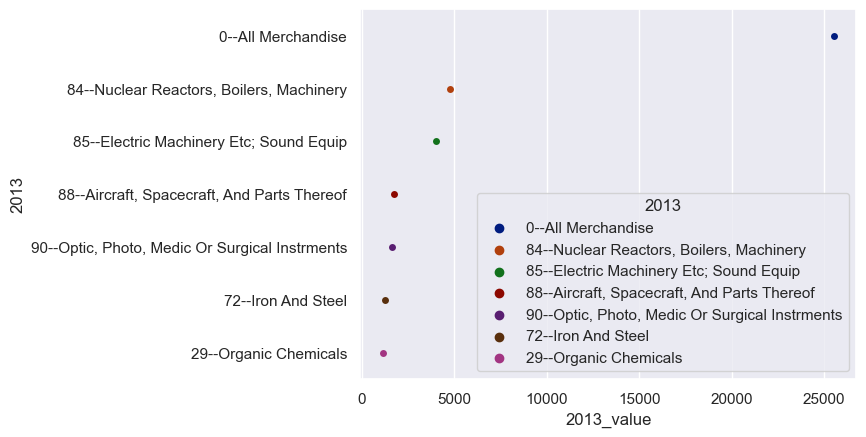

In [297]:
#PieCharts
sns.set_theme(style="darkgrid")
sns.swarmplot(expT10_df, x="2013_value", y="2013", hue="2013", palette= 'dark')

In [298]:
ex_Yearlist_Exports
ex_Yearlist_Imports


NameError: name 'ex_Yearlist_Imports' is not defined

In [226]:

#Create a pie chart
Fig3 = px.pie(ixft7, values='Year', names='Year', color='Product', title='Pie chart')
Fig3.show()


In [320]:
print(ex_Yearlist_Exports)

<class 'pandas.core.frame.DataFrame'>


In [336]:
Fig4 = px.bar(TimpY_top7, x="Product", y="Year", color="value", orientation="h")
Fig4.show()

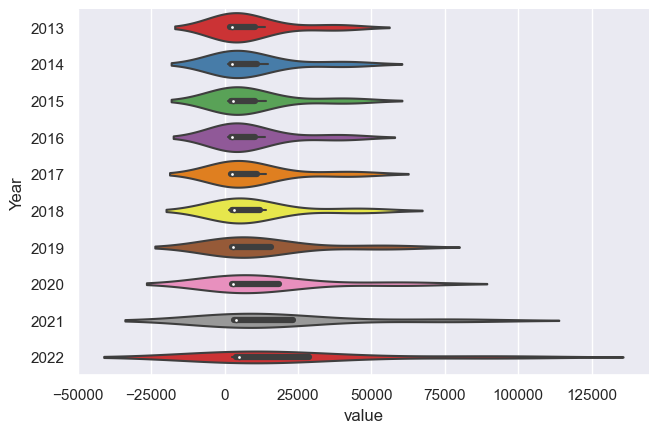

In [356]:
#Top 7 Imports per Value per Year
Fig20 = sns.catplot(TimpY_top7, x='value', y='Year', kind='violin', height=4.5, aspect=1.5, palette='Set1', medianprops={"color": "coral"},
)

In [407]:
TexpY_top7

,Year,Product,value
0,2013,0--All Merchandise,25523.0
1,2013,"84--Nuclear Reactors, Boilers, Machinery",4748.0
2,2013,85--Electric Machinery Etc; Sound Equip,4041.0
3,2013,"88--Aircraft, Spacecraft, And Parts Thereof",1752.0
4,2013,"90--Optic, Photo, Medic Or Surgical Instrments",1633.0
...,...,...,...
65,2022,85--Electric Machinery Etc; Sound Equip,7842.0
66,2022,"27--Mineral Fuel, Oil; Bitumin Subst",7188.0
67,2022,"90--Optic, Photo, Medic Or Surgical Instrments",3008.0
68,2022,"88--Aircraft, Spacecraft, And Parts Thereof",1958.0


In [536]:
Fig5 = px.bar(ExportsTop10, y='value', x='Year', color='Product', text_auto='.4s',
            title="Top 10 Exporters by Product - Stached Bar Chart")
Fig5.show()

In [388]:
#Create a pie chart
Fig3 = px.bar(TimpY_top7, x='value', y= "Product", color='Year', title='Top 7 Products - Imports per Year')
Fig3.show()


In [406]:
#Create a pie chart
Fig9 = px.bar(TexpY_top7, x='value', y= "Product", color='Year', title='Top 7 Products - Exports per Year')
Fig9.show()

In [412]:
#Total Top 7 (Exports, Imports) per Year
Total_Top_7 = (TexpY_top7 + TimpY_top7)

In [413]:
Total_Top_7

,Year,Product,value
0,20132013,0--All Merchandise0--All Merchandise,63462.0
1,20132013,"84--Nuclear Reactors, Boilers, Machinery85--El...",18645.0
2,20132013,85--Electric Machinery Etc; Sound Equip84--Nuc...,10663.0
3,20132013,"88--Aircraft, Spacecraft, And Parts Thereof87-...",4118.0
4,20132013,"90--Optic, Photo, Medic Or Surgical Instrments...",3928.0
...,...,...,...
65,20222022,85--Electric Machinery Etc; Sound Equip84--Nuc...,36036.0
66,20222022,"27--Mineral Fuel, Oil; Bitumin Subst73--Articl...",11917.0
67,20222022,"90--Optic, Photo, Medic Or Surgical Instrments...",7535.0
68,20222022,"88--Aircraft, Spacecraft, And Parts Thereof39-...",5379.0


In [537]:
type(expT10_df)

dict

### 2nd Issue

In [395]:

Fig6 = px.bar(ex_Yearlist_Exports, y='Year', x='value', text_auto='.4s',
            title="Top 10 Exporters by Product - Stached Bar Chart")
Fig6.show()

ValueError: DataFrame constructor not properly called!

In [546]:
#Create a pie chart
Fig3 = px.pie(ex_Yearlist_Exports, values='Product', names='Product', color='Product', title='Pie chart')
Fig3.show()

ValueError: DataFrame constructor not properly called!

#### Issue 1

In [523]:


for k in expT10_df: print(k+":"+str(len(expT10_df[k])))




2013:7
2013_value:7
2014:7
2014_value:7
2015:7
2015_value:7
2016:7
2016_value:7
2017:7
2017_value:7
2018:7
2018_value:7
2019:7
2019_value:7
20202021:0
20202021_value:0
2022:7
2022_value:7


In [518]:
expT10_df

{'2013': ['0--All Merchandise',
  '84--Nuclear Reactors, Boilers, Machinery',
  '85--Electric Machinery Etc; Sound Equip',
  '88--Aircraft, Spacecraft, And Parts Thereof',
  '90--Optic, Photo, Medic Or Surgical Instrments',
  '72--Iron And Steel',
  '29--Organic Chemicals'],
 '2013_value': [25523.0, 4748.0, 4041.0, 1752.0, 1633.0, 1243.0, 1138.0],
 '2014': ['0--All Merchandise',
  '84--Nuclear Reactors, Boilers, Machinery',
  '85--Electric Machinery Etc; Sound Equip',
  '88--Aircraft, Spacecraft, And Parts Thereof',
  '90--Optic, Photo, Medic Or Surgical Instrments',
  '29--Organic Chemicals',
  '72--Iron And Steel'],
 '2014_value': [26675.0, 4363.0, 4222.0, 2860.0, 1838.0, 1269.0, 1040.0],
 '2015': ['0--All Merchandise',
  '84--Nuclear Reactors, Boilers, Machinery',
  '85--Electric Machinery Etc; Sound Equip',
  '88--Aircraft, Spacecraft, And Parts Thereof',
  '90--Optic, Photo, Medic Or Surgical Instrments',
  '93--Arms & Ammunition',
  '29--Organic Chemicals'],
 '2015_value': [25826

In [330]:
#Selecting Top Specific Products to Analyse - Imports
# Filter by 'Exports'
TimpY.query("Product == '0--All Merchandise'")

,Product,Flow,Country,Product Classification,Unit,Year,value
0,0--All Merchandise,Imports,Taiwan,HS - 2,Millions of USD,2013,37939.0
98,0--All Merchandise,Imports,Taiwan,HS - 2,Millions of USD,2014,40840.0
196,0--All Merchandise,Imports,Taiwan,HS - 2,Millions of USD,2015,40911.0
294,0--All Merchandise,Imports,Taiwan,HS - 2,Millions of USD,2016,39199.0
392,0--All Merchandise,Imports,Taiwan,HS - 2,Millions of USD,2017,42418.0
490,0--All Merchandise,Imports,Taiwan,HS - 2,Millions of USD,2018,45709.0
588,0--All Merchandise,Imports,Taiwan,HS - 2,Millions of USD,2019,54229.0
686,0--All Merchandise,Imports,Taiwan,HS - 2,Millions of USD,2020,60432.0
784,0--All Merchandise,Imports,Taiwan,HS - 2,Millions of USD,2021,77064.0
882,0--All Merchandise,Imports,Taiwan,HS - 2,Millions of USD,2022,91845.0


In [404]:
#Selecting Top Specific Products to Analyse - Imports
# Filter by 'Imprts'
ixft7 = TimpY[TimpY['Flow'] == 'Imports']

# Group by 'Year' and 'Product', and sum the 'value'
ixft7_grouped = ixft7.groupby(['Year', 'Product']).sum()['value']

# Sort by 'Year' and 'value', and get the top 7 for each year
TimpY_top7 = ixft7_grouped.groupby('Year').nlargest(7).reset_index(level=0, drop=True).reset_index()

# Print the new dataframe
print(TimpY_top7)

    Year                                         Product    value
0   2013                              0--All Merchandise  37939.0
1   2013         85--Electric Machinery Etc; Sound Equip  13897.0
2   2013        84--Nuclear Reactors, Boilers, Machinery   6622.0
3   2013         87--Vehicles, Except Railway Or Tramway   2366.0
4   2013                   73--Articles Of Iron Or Steel   2295.0
..   ...                                             ...      ...
65  2022        84--Nuclear Reactors, Boilers, Machinery  28194.0
66  2022                   73--Articles Of Iron Or Steel   4729.0
67  2022         87--Vehicles, Except Railway Or Tramway   4527.0
68  2022                 39--Plastics & Articles Thereof   3421.0
69  2022  90--Optic, Photo, Medic Or Surgical Instrments   2638.0

[70 rows x 3 columns]


C:\Users\olver\AppData\Local\Temp\ipykernel_32940\60256374.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [403]:
TexpY

,Product,Flow,Country,Product Classification,Unit,Year,value
0,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,2013,25523.0
1,"84--Nuclear Reactors, Boilers, Machinery",Exports,Taiwan,HS - 2,Millions of USD,2013,4748.0
2,85--Electric Machinery Etc; Sound Equip,Exports,Taiwan,HS - 2,Millions of USD,2013,4041.0
3,"27--Mineral Fuel, Oil; Bitumin Subst",Exports,Taiwan,HS - 2,Millions of USD,2013,1127.0
4,"90--Optic, Photo, Medic Or Surgical Instrments",Exports,Taiwan,HS - 2,Millions of USD,2013,1633.0
...,...,...,...,...,...,...,...
975,"46--Mfr Of Straw, Esparto",Exports,Taiwan,HS - 2,Millions of USD,2022,0.0
976,45--Cork And Articles Of Cork,Exports,Taiwan,HS - 2,Millions of USD,2022,0.0
977,"66--Umbrellas, Walking-Sticks",Exports,Taiwan,HS - 2,Millions of USD,2022,0.0
978,53--Veg Text Fib Nesoi,Exports,Taiwan,HS - 2,Millions of USD,2022,0.0


In [402]:
#Selecting Top Specific Products to Analyse - Exports
# Filter by 'Exports'
exft7 = TexpY[TexpY['Flow'] == 'Exports']

# Group by 'Year' and 'Product', and sum the 'value'
exft7_grouped = exft7.groupby(['Year', 'Product']).sum()['value']

# Sort by 'Year' and 'value', and get the top 7 for each year
TexpY_top7 = exft7_grouped.groupby('Year').nlargest(7).reset_index(level=0, drop=True).reset_index()
print(TexpY_top7)

    Year                                         Product    value
0   2013                              0--All Merchandise  25523.0
1   2013        84--Nuclear Reactors, Boilers, Machinery   4748.0
2   2013         85--Electric Machinery Etc; Sound Equip   4041.0
3   2013     88--Aircraft, Spacecraft, And Parts Thereof   1752.0
4   2013  90--Optic, Photo, Medic Or Surgical Instrments   1633.0
..   ...                                             ...      ...
65  2022         85--Electric Machinery Etc; Sound Equip   7842.0
66  2022            27--Mineral Fuel, Oil; Bitumin Subst   7188.0
67  2022  90--Optic, Photo, Medic Or Surgical Instrments   3008.0
68  2022     88--Aircraft, Spacecraft, And Parts Thereof   1958.0
69  2022                 39--Plastics & Articles Thereof   1236.0

[70 rows x 3 columns]


C:\Users\olver\AppData\Local\Temp\ipykernel_32940\3247128299.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [189]:
ixft7_grouped.to_frame().columns

Index(['value'], dtype='object')

In [123]:
print(TimpY_top7)

    Year                                         Product    value
0   2013                              0--All Merchandise  37939.0
1   2013         85--Electric Machinery Etc; Sound Equip  13897.0
2   2013        84--Nuclear Reactors, Boilers, Machinery   6622.0
3   2013         87--Vehicles, Except Railway Or Tramway   2366.0
4   2013                   73--Articles Of Iron Or Steel   2295.0
..   ...                                             ...      ...
65  2022        84--Nuclear Reactors, Boilers, Machinery  28194.0
66  2022                   73--Articles Of Iron Or Steel   4729.0
67  2022         87--Vehicles, Except Railway Or Tramway   4527.0
68  2022                 39--Plastics & Articles Thereof   3421.0
69  2022  90--Optic, Photo, Medic Or Surgical Instrments   2638.0

[70 rows x 3 columns]


In [124]:
#Selecting Top Specific Products to Analyse - All Merchandise
Exports_Total = TexpY.query("Product == '0--All Merchandise'")
Imports_Total = TimpY.query("Product == '0--All Merchandise'")


In [ ]:
#Filtering top Products and Values by "Year" both Imports and Exports.


In [526]:
#Establishing a Year List by Year (Exports) 
Yearlist_Exports = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
TexpY.query('Year.isin(@Yearlist_Exports)').sort_values('value', ascending=False).head(25)

,Product,Flow,Country,Product Classification,Unit,Year,value
882,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,2022,43713.0
784,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,2021,36838.0
588,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,2019,31202.0
490,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,2018,30478.0
686,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,2020,30213.0
98,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,2014,26675.0
294,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,2016,26034.0
196,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,2015,25826.0
392,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,2017,25736.0
0,0--All Merchandise,Exports,Taiwan,HS - 2,Millions of USD,2013,25523.0


In [190]:
Top10_Exports(Yearlist_Exports)

{'2013': ['0--All Merchandise',
  '84--Nuclear Reactors, Boilers, Machinery',
  '85--Electric Machinery Etc; Sound Equip',
  '88--Aircraft, Spacecraft, And Parts Thereof',
  '90--Optic, Photo, Medic Or Surgical Instrments',
  '72--Iron And Steel',
  '29--Organic Chemicals'],
 '2013_value': [25523.0, 4748.0, 4041.0, 1752.0, 1633.0, 1243.0, 1138.0],
 '2014': ['0--All Merchandise',
  '84--Nuclear Reactors, Boilers, Machinery',
  '85--Electric Machinery Etc; Sound Equip',
  '88--Aircraft, Spacecraft, And Parts Thereof',
  '90--Optic, Photo, Medic Or Surgical Instrments',
  '29--Organic Chemicals',
  '72--Iron And Steel'],
 '2014_value': [26675.0, 4363.0, 4222.0, 2860.0, 1838.0, 1269.0, 1040.0],
 '2015': ['0--All Merchandise',
  '84--Nuclear Reactors, Boilers, Machinery',
  '85--Electric Machinery Etc; Sound Equip',
  '88--Aircraft, Spacecraft, And Parts Thereof',
  '90--Optic, Photo, Medic Or Surgical Instrments',
  '93--Arms & Ammunition',
  '29--Organic Chemicals'],
 '2015_value': [25826

In [81]:
#Establishing a Year List by Year (Imports)
Yearlist_Exports = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
for T in Yearlist_Exports: print(Top10_Exports(T))

{'2': [], '2_value': [], '0': [], '0_value': [], '1': [], '1_value': [], '3': [], '3_value': []}
{'2': [], '2_value': [], '0': [], '0_value': [], '1': [], '1_value': [], '4': [], '4_value': []}
{'2': [], '2_value': [], '0': [], '0_value': [], '1': [], '1_value': [], '5': [], '5_value': []}
{'2': [], '2_value': [], '0': [], '0_value': [], '1': [], '1_value': [], '6': [], '6_value': []}
{'2': [], '2_value': [], '0': [], '0_value': [], '1': [], '1_value': [], '7': [], '7_value': []}
{'2': [], '2_value': [], '0': [], '0_value': [], '1': [], '1_value': [], '8': [], '8_value': []}
{'2': [], '2_value': [], '0': [], '0_value': [], '1': [], '1_value': [], '9': [], '9_value': []}
{'2': [], '2_value': [], '0': [], '0_value': []}
{'2': [], '2_value': [], '0': [], '0_value': [], '1': [], '1_value': []}
{'2': [], '2_value': [], '0': [], '0_value': []}


In [219]:
ex_Yearlist_Exports = pd.DataFrame

In [222]:
print(ex_Yearlist_Exports)

<class 'pandas.core.frame.DataFrame'>


In [83]:
#Creating a function to get the top 10 exports for each year
def Top10_Imports(YR):
    RS = dict()
    for Y in YR:
        Yearlist_Imports= list(TimpY[TimpY.Year == Y].sort_values('value', ascending=False).head(7)["Product"])
        RS[Y] = Yearlist_Imports
    return RS 


In [533]:
ExportsT10 = Top10_Exports(Yearlist_Exports)

In [539]:
ExportsT10 = pd.DataFrame(ExportsT10)

In [540]:
ExportsT10

,2013,2013_value,2014,2014_value,2015,2015_value,2016,2016_value,2017,2017_value,2018,2018_value,2019,2019_value,2020,2020_value,2021,2021_value,2022,2022_value
0,0--All Merchandise,25523.0,0--All Merchandise,26675.0,0--All Merchandise,25826.0,0--All Merchandise,26034.0,0--All Merchandise,25736.0,0--All Merchandise,30478.0,0--All Merchandise,31202.0,0--All Merchandise,30213.0,0--All Merchandise,36838.0,0--All Merchandise,43713.0
1,"84--Nuclear Reactors, Boilers, Machinery",4748.0,"84--Nuclear Reactors, Boilers, Machinery",4363.0,"84--Nuclear Reactors, Boilers, Machinery",4937.0,"84--Nuclear Reactors, Boilers, Machinery",5360.0,"84--Nuclear Reactors, Boilers, Machinery",5043.0,85--Electric Machinery Etc; Sound Equip,4866.0,"84--Nuclear Reactors, Boilers, Machinery",5617.0,"84--Nuclear Reactors, Boilers, Machinery",5695.0,"84--Nuclear Reactors, Boilers, Machinery",7502.0,"84--Nuclear Reactors, Boilers, Machinery",8748.0
2,85--Electric Machinery Etc; Sound Equip,4041.0,85--Electric Machinery Etc; Sound Equip,4222.0,85--Electric Machinery Etc; Sound Equip,4500.0,85--Electric Machinery Etc; Sound Equip,5208.0,85--Electric Machinery Etc; Sound Equip,4850.0,"84--Nuclear Reactors, Boilers, Machinery",4655.0,85--Electric Machinery Etc; Sound Equip,4513.0,85--Electric Machinery Etc; Sound Equip,5251.0,85--Electric Machinery Etc; Sound Equip,6745.0,85--Electric Machinery Etc; Sound Equip,7842.0
3,"88--Aircraft, Spacecraft, And Parts Thereof",1752.0,"88--Aircraft, Spacecraft, And Parts Thereof",2860.0,"88--Aircraft, Spacecraft, And Parts Thereof",2890.0,"88--Aircraft, Spacecraft, And Parts Thereof",3157.0,"88--Aircraft, Spacecraft, And Parts Thereof",2867.0,"27--Mineral Fuel, Oil; Bitumin Subst",3968.0,"27--Mineral Fuel, Oil; Bitumin Subst",4465.0,"27--Mineral Fuel, Oil; Bitumin Subst",3277.0,"27--Mineral Fuel, Oil; Bitumin Subst",4674.0,"27--Mineral Fuel, Oil; Bitumin Subst",7188.0
4,"90--Optic, Photo, Medic Or Surgical Instrments",1633.0,"90--Optic, Photo, Medic Or Surgical Instrments",1838.0,"90--Optic, Photo, Medic Or Surgical Instrments",1814.0,"90--Optic, Photo, Medic Or Surgical Instrments",1751.0,"90--Optic, Photo, Medic Or Surgical Instrments",1803.0,"88--Aircraft, Spacecraft, And Parts Thereof",2621.0,"88--Aircraft, Spacecraft, And Parts Thereof",2737.0,"90--Optic, Photo, Medic Or Surgical Instrments",2274.0,"90--Optic, Photo, Medic Or Surgical Instrments",2464.0,"90--Optic, Photo, Medic Or Surgical Instrments",3008.0
5,72--Iron And Steel,1243.0,29--Organic Chemicals,1269.0,93--Arms & Ammunition,1529.0,29--Organic Chemicals,824.0,29--Organic Chemicals,863.0,"90--Optic, Photo, Medic Or Surgical Instrments",2086.0,"90--Optic, Photo, Medic Or Surgical Instrments",2217.0,"88--Aircraft, Spacecraft, And Parts Thereof",2111.0,"88--Aircraft, Spacecraft, And Parts Thereof",2189.0,"88--Aircraft, Spacecraft, And Parts Thereof",1958.0
6,29--Organic Chemicals,1138.0,72--Iron And Steel,1040.0,29--Organic Chemicals,891.0,10--Cereals,759.0,39--Plastics & Articles Thereof,829.0,29--Organic Chemicals,1108.0,39--Plastics & Articles Thereof,909.0,39--Plastics & Articles Thereof,968.0,39--Plastics & Articles Thereof,1133.0,39--Plastics & Articles Thereof,1236.0


In [534]:
ExportsTop10

,Product,Flow,Country,Product Classification,Unit,Year,value
303,"98--Special Classification Provisions, Nesoi",Exports,Taiwan,HS - 2,Millions of USD,2016,478.0
499,"98--Special Classification Provisions, Nesoi",Exports,Taiwan,HS - 2,Millions of USD,2018,613.0
793,"98--Special Classification Provisions, Nesoi",Exports,Taiwan,HS - 2,Millions of USD,2021,703.0
401,"98--Special Classification Provisions, Nesoi",Exports,Taiwan,HS - 2,Millions of USD,2017,526.0
107,"98--Special Classification Provisions, Nesoi",Exports,Taiwan,HS - 2,Millions of USD,2014,500.0
597,"98--Special Classification Provisions, Nesoi",Exports,Taiwan,HS - 2,Millions of USD,2019,638.0
695,"98--Special Classification Provisions, Nesoi",Exports,Taiwan,HS - 2,Millions of USD,2020,610.0
9,"98--Special Classification Provisions, Nesoi",Exports,Taiwan,HS - 2,Millions of USD,2013,402.0
891,"98--Special Classification Provisions, Nesoi",Exports,Taiwan,HS - 2,Millions of USD,2022,1006.0
205,"98--Special Classification Provisions, Nesoi",Exports,Taiwan,HS - 2,Millions of USD,2015,422.0


In [131]:
Top10_Exports(Yearlist_Exports)

{'2013': ['0--All Merchandise',
  '84--Nuclear Reactors, Boilers, Machinery',
  '85--Electric Machinery Etc; Sound Equip',
  '88--Aircraft, Spacecraft, And Parts Thereof',
  '90--Optic, Photo, Medic Or Surgical Instrments',
  '72--Iron And Steel',
  '29--Organic Chemicals'],
 '2013_value': [25523.0, 4748.0, 4041.0, 1752.0, 1633.0, 1243.0, 1138.0],
 '2014': ['0--All Merchandise',
  '84--Nuclear Reactors, Boilers, Machinery',
  '85--Electric Machinery Etc; Sound Equip',
  '88--Aircraft, Spacecraft, And Parts Thereof',
  '90--Optic, Photo, Medic Or Surgical Instrments',
  '29--Organic Chemicals',
  '72--Iron And Steel'],
 '2014_value': [26675.0, 4363.0, 4222.0, 2860.0, 1838.0, 1269.0, 1040.0],
 '2015': ['0--All Merchandise',
  '84--Nuclear Reactors, Boilers, Machinery',
  '85--Electric Machinery Etc; Sound Equip',
  '88--Aircraft, Spacecraft, And Parts Thereof',
  '90--Optic, Photo, Medic Or Surgical Instrments',
  '93--Arms & Ammunition',
  '29--Organic Chemicals'],
 '2015_value': [25826

In [132]:
Top10_Imports(Yearlist_Imports)

{'2013': ['0--All Merchandise',
  '85--Electric Machinery Etc; Sound Equip',
  '84--Nuclear Reactors, Boilers, Machinery',
  '87--Vehicles, Except Railway Or Tramway',
  '73--Articles Of Iron Or Steel',
  '39--Plastics & Articles Thereof',
  '90--Optic, Photo, Medic Or Surgical Instrments'],
 '2014': ['0--All Merchandise',
  '85--Electric Machinery Etc; Sound Equip',
  '84--Nuclear Reactors, Boilers, Machinery',
  '73--Articles Of Iron Or Steel',
  '87--Vehicles, Except Railway Or Tramway',
  '39--Plastics & Articles Thereof',
  '90--Optic, Photo, Medic Or Surgical Instrments'],
 '2015': ['0--All Merchandise',
  '85--Electric Machinery Etc; Sound Equip',
  '84--Nuclear Reactors, Boilers, Machinery',
  '87--Vehicles, Except Railway Or Tramway',
  '73--Articles Of Iron Or Steel',
  '39--Plastics & Articles Thereof',
  '90--Optic, Photo, Medic Or Surgical Instrments'],
 '2016': ['0--All Merchandise',
  '85--Electric Machinery Etc; Sound Equip',
  '84--Nuclear Reactors, Boilers, Machinery'

In [195]:
#Creating a dictionary with the top 10 imports for each year
Yearlist_Imports = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
for Y in Yearlist_Imports: print(Top10_Imports(Y))

{'2': [], '0': [], '1': [], '3': []}
{'2': [], '0': [], '1': [], '4': []}
{'2': [], '0': [], '1': [], '5': []}
{'2': [], '0': [], '1': [], '6': []}
{'2': [], '0': [], '1': [], '7': []}
{'2': [], '0': [], '1': [], '8': []}
{'2': [], '0': [], '1': [], '9': []}
{'2': [], '0': []}
{'2': [], '0': [], '1': []}
{'2': [], '0': []}


In [532]:
expT10_df = pd.DataFrame(expT10_df)

ValueError: All arrays must be of the same length

In [531]:
type(expT10_df)

dict

In [246]:
#Creating a piechart with for Year 2012
Fig3 = px.pie(expT10_df, values='2013_value', names='2013')
fig.show()

ValueError: All arrays must be of the same length

In [ ]:
#Save

In [568]:
TwoWayTrade_Top = pd.merge(TexpY_top7,TimpY_top7 , how='inner', on=['Product', 'Year'])
TwoWayTrade_Top.rename(columns={"value_x": "Exports", "value_y": "Imports"}, inplace=True)

In [565]:
TexpY_top7

,Year,Product,value
0,2013,0--All Merchandise,25523.0
1,2013,"84--Nuclear Reactors, Boilers, Machinery",4748.0
2,2013,85--Electric Machinery Etc; Sound Equip,4041.0
3,2013,"88--Aircraft, Spacecraft, And Parts Thereof",1752.0
4,2013,"90--Optic, Photo, Medic Or Surgical Instrments",1633.0
...,...,...,...
65,2022,85--Electric Machinery Etc; Sound Equip,7842.0
66,2022,"27--Mineral Fuel, Oil; Bitumin Subst",7188.0
67,2022,"90--Optic, Photo, Medic Or Surgical Instrments",3008.0
68,2022,"88--Aircraft, Spacecraft, And Parts Thereof",1958.0


In [573]:
TwoWayTrade_Top

,Year,Product,Exports,Imports,Trade imbalance,Two-Way Trade
0,2013,0--All Merchandise,25523.0,37939.0,-12416.0,63462.0
1,2013,"84--Nuclear Reactors, Boilers, Machinery",4748.0,6622.0,-1874.0,11370.0
2,2013,85--Electric Machinery Etc; Sound Equip,4041.0,13897.0,-9856.0,17938.0
3,2013,"90--Optic, Photo, Medic Or Surgical Instrments",1633.0,1094.0,539.0,2727.0
4,2014,0--All Merchandise,26675.0,40840.0,-14165.0,67515.0
5,2014,"84--Nuclear Reactors, Boilers, Machinery",4363.0,7053.0,-2690.0,11416.0
6,2014,85--Electric Machinery Etc; Sound Equip,4222.0,14721.0,-10499.0,18943.0
7,2014,"90--Optic, Photo, Medic Or Surgical Instrments",1838.0,1266.0,572.0,3104.0
8,2015,0--All Merchandise,25826.0,40911.0,-15085.0,66737.0
9,2015,"84--Nuclear Reactors, Boilers, Machinery",4937.0,6709.0,-1772.0,11646.0


In [570]:
#Trade imbalance = Imports - Exports
TwoWayTrade_Top['Trade imbalance'] = TwoWayTrade_Top['Exports'] - TwoWayTrade_Top['Imports']

In [572]:
#Two Way Trade Balance
TwoWayTrade_Top['Two-Way Trade'] = TwoWayTrade_Top['Exports'] + TwoWayTrade_Top['Imports']

In [424]:
sns.lineplot(TwowayTrade_Top, x="Year", y="Product", hue="value")

NameError: name 'TwowayTrade_Top' is not defined

In [449]:
#Sankey Diagram
# Get unique nodes from the DataFrame
nodes = pd.Index(TimpY_top7['Year'].unique().tolist() + TimpY_top7['Product'].unique().tolist())

# Create a dictionary to map nodes to indices
node_indices = {node: index for index, node in enumerate(nodes)}

# Convert DataFrame links to match Sankey format
links = TimpY_top7.apply(lambda row: {
    'source': node_indices[row['Year']],
    'target': node_indices[row['Product']],
    'value': row['value']
}, axis=1).tolist()

# Create the Sankey diagram
figS1 = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=nodes,
        color='blue'
    ),
    link=dict(
        source=[link['source'] for link in links],
        target=[link['target'] for link in links],
        value=[link['value'] for link in links]
    )
)])

# Customize the layout
figS1.update_layout(title_text="USA --> Taiwan - Imports", font_size=10)

# Display the plot
figS1.show()

In [448]:
#Sankey Diagram
# Get unique nodes from the DataFrame
nodes = pd.Index(TexpY_top7['Year'].unique().tolist() + TexpY_top7['Product'].unique().tolist())

# Create a dictionary to map nodes to indices
node_indices = {node: index for index, node in enumerate(nodes)}

# Convert DataFrame links to match Sankey format
links = TexpY_top7.apply(lambda row: {
    'source': node_indices[row['Year']],
    'target': node_indices[row['Product']],
    'value': row['value']
}, axis=1).tolist()

# Create the Sankey diagram
figS2 = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color='red', width=0.5),
        label=nodes,
        color='orange'
    ),
    link=dict(
        source=[link['source'] for link in links],
        target=[link['target'] for link in links],
        value=[link['value'] for link in links]
    )
)])

# Customize the layout
figS2.update_layout(title_text="USA --> Taiwan - Exports", font_size=10)

# Display the plot
figS1.show()

In [ ]:
#Chord Diagrams

In [454]:
figC1 = go.Figure(TimpY_top7=go.Chord(
    matrix=df.values,
    labels=df['Year'],
    colorscale='Viridis'
))

figC1.show()

AttributeError: module 'plotly.graph_objects' has no attribute 'Chord'

In [488]:
figSP1 = go.Figure(data=[
    go.Scatter(x=TimpY_top7['Year'], y=TimpY_top7['value'], mode='lines', name='Line 1'),
    go.Scatter(x=TexpY_top7['Year'], y=TexpY_top7['value'], mode='lines', name='Line 2')
])

figSP1.show()

In [494]:
figSP1 = go.Figure(data=[
    go.Scatter(x=TimpY_top7['value'], y=TimpY_top7['Product'], mode='lines', stackgroup='one', name='Line 1'),
    go.Scatter(x=TimpY_top7['value'], y=TimpY_top7['Product'], mode='lines', stackgroup='one', name='Line 2'),
    
])

figSP1.update_layout(
    yaxis=dict(title='Value'),
    xaxis=dict(title='Year'),
    hovermode='x'
)

figSP1.show()






In [515]:
figCD1 = go.Figure(data=[go.Choropleth(
    locations=TimpY_top7['Taiwan'],
    z=TimpY_top7['China'],
    colorscale='Viridis',
    text=TimpY_top7['Year'],
    hoverinfo='text'
)])

figCD1.update_layout(
    title='Import Top 7Chord Diagram',
    xaxis=dict(title='Product'),
    yaxis=dict(title='Value')
)

figCD1.show()

KeyError: 'Taiwan'

In [558]:
TimpY_top7_sansP = TimpY_top7.query("~Product.str.contains('0--All')")
TexpY_top7_sansP = TexpY_top7.query("~Product.str.contains('0--All')")

In [560]:
def Piechart (TimpY_top7_sansP =TimpY_top7_sansP, TXT = 'IMPRTS'):    
    total_value = TimpY_top7_sansP['value'].sum()

    # Create the donut chart
    figP1 = go.Figure(data=[go.Pie(
        labels=TimpY_top7_sansP['Product'],
        values=TimpY_top7_sansP['value'],
        hole=0.5,
        textinfo='label+percent',
        insidetextorientation='radial'
    )])

    # Add the total value in the center
    figP1.add_annotation(
        text=str(total_value),
        x=0.5,
        y=0.5,
        font=dict(size=20),
        showarrow=False
    )

    # Set the layout
    figP1.update_layout(
        title='Top 7 '+TXT+' Data',
        showlegend=False
    )

    # Show the chart
    figP1.show()








In [562]:
Piechart(TexpY_top7_sansP, 'EXPRTS')

In [555]:
Piechart()